In [1]:
import os
import env
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from env import host, username, password
from datetime import date
from datetime import timedelta
from datetime import datetime

In [2]:
os.path.exists('env.py')

True

In [3]:
alpha = 0.05

In [4]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# - then give an example of what a true positive, true negative, type I and type II errors would look like. 
# - Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as 
# - more precise questions that could be tested.

In [5]:
def get_db_url(e):
    if env:
        user = env.username
        password = env.password
        host = env.data.codeup.com

In [6]:
def get_db_url(username, hostname, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

In [7]:
url = get_db_url(username, host, password, 'employees')

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


# Has the network latency gone up since we switched internet service providers?
##### Null hypothesis: The network latency has not changed since providers were switched
##### Alternative Hypothesis: There has been an increase in latency since we switched providers
##### True Negative: Latency was presumed to have changed, and reality has proved that assumption to be True
##### True Positive: Latency was presumed to not have changed, and reality has proved that assumption to be True
##### False Positive (Type I): Latency was presumed to have changed, and reality has proved that assumption to be False
##### False Negative (Type II): Latency was presumed to not have changed, and reality has proved our assumption it to be False


# Is the website redesign any good?
##### Null hypothesis: Our website has not experienced any additional users since it was redesigned
##### Alternative Hypothesis: Our website has more users since it was redesigned
##### True Negative: We assumed the redesign brought more users, and reality has proved that assumption to be True
##### True Positive: We assumed the redesign did not bring more users, and reality has proved that assumption to be True
##### False Positive (Type I): We assumed the redesign brought more users, and reality has proved that assumption to be False
##### False Negative (Type II): We assumed the redesign did not bring more users, and reality has proved that assumption to be True

# Is our television ad driving more sales?
##### Null hypothesis: Our sales remained the same after the television ad was aired
##### Alternative Hypothesis: Our ad increased our sales
##### True Negative: We assumed the ad increased our sales, and reality has proved that assumption to be True
##### True Positive: We assumed the ad did not affect our sales, and reality has proved that assumption to be True
##### False Positive (Type I): We assumed the ad increased our sales, and reality has proved that assumption to be False
##### False Negative (Type II): We assumed the ad did not affect our sales, and reality has proved that assumption to be False

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [8]:
#Null Hyothesis(H0) = Office 1's time to sell is the same as (==) Office 2
#Alternate Hypothesis(Hα) = Office 1's time to sell is not the same as (!=) Office 2

two-tailed test because we are testing for inequality. Two samples.

$H_0$
$H_a$

In [9]:
o1 = stats.norm(90, 15).rvs(40)
o2 = stats.norm(100, 20).rvs(50)

In [10]:
o1

array([119.52128859,  99.0229729 ,  98.99877911, 108.35521193,
        72.70740596, 113.94653348,  82.56463026,  94.88867686,
       102.74922909,  57.68071032,  84.43633711,  71.62353181,
        76.80288528,  74.52906618,  92.41211622,  93.44363355,
        73.89542573,  82.21576343,  98.36697236,  83.65132481,
        97.04972604, 103.8677218 ,  78.95822875,  94.99958737,
        91.64083661,  76.95907043, 107.92651855,  91.86490925,
        57.4501125 ,  60.65393488,  74.0181358 ,  93.11671254,
        76.52281773,  94.69122054,  92.30943172, 105.00906882,
        92.50623577,  93.40102126, 100.32155591,  91.41067965])

## 

In [11]:
o2

array([ 90.99547905,  86.66783926,  55.09654096, 125.41280844,
        99.85530378,  85.96844882,  77.38883443, 115.64686994,
       109.47035277, 109.08649694, 108.66910558, 101.31264325,
        79.15090718,  89.070683  ,  90.66915402,  93.31524348,
        94.63274713,  60.71495951, 103.5619505 , 107.58571114,
        98.76767127,  88.72095408, 121.84045871,  78.90991934,
        84.11857779,  88.6782906 , 111.02663869, 109.71099876,
        87.3714166 ,  81.01250355, 106.75188341,  89.07034401,
       107.01455354,  94.2122383 ,  94.96045938, 125.03410426,
        91.19281527,  80.96250173,  60.70036907,  98.34121386,
        86.55691954,  98.61181968,  83.47217109, 113.64770782,
       127.45812278, 118.33512629,  81.93004496, 110.90314602,
       121.58074014, 142.46423007])

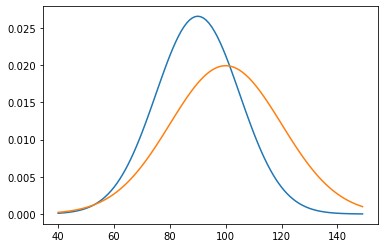

In [12]:
x = np.arange(40,150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y1)
plt.plot(x, y2)

In [13]:
#variance: levene test them

In [14]:
stat, p_val = stats.levene(o1, o2)

In [15]:
if p_val < alpha:
    print('We can reject H0')

In [16]:
t_stat, p_val = stats.ttest_ind(o1, o2, equal_var=False)

In [17]:
stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

# Load the mpg dataset and use it to answer the following questions:

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
##### Two-tailed. Two samples
### Are compact cars more fuel-efficient than the average car?
### Do manual cars get better gas mileage than automatic cars?

In [18]:
'''Set the alpha value'''
alpha = 0.05

In [19]:
'''Load the mpg database'''
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [20]:
len(mpg)

234

In [21]:
'''I want to see how many vehicles are each year within mpg '''
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [22]:
#mpg.cty.hist()

In [31]:
mpg_2008 = mpg[mpg.year == 2008]
mpg_2008.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0


In [29]:
mpg['mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [32]:
mpg_2008

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,21.0
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,20.0
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize,21.0
18,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize,19.5
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0


In [33]:
'''printing out all of the means of city mpg, hwy mpg, and combined mpg. I then checked to see if the combined 
mpg mean fell exactly in the middle of the two.'''
print('The mean 2008 city mpg is', mpg_2008.cty.mean())
print('The mean 2008 hwy mpg is', mpg_2008.hwy.mean())
print('The mean 2008 overall mpg is', mpg_2008.mpg.mean())
print((mpg_2008.hwy.mean() - mpg_2008.cty.mean()) / 2)
3.3760683760683747 + 16.700854700854702

The mean 2008 city mpg is 16.700854700854702
The mean 2008 hwy mpg is 23.45299145299145
The mean 2008 overall mpg is 20.076923076923077
3.3760683760683747


20.076923076923077

In [34]:
t, p = stats.ttest_1samp(mpg_2008.mpg, mpg.mpg.mean())
print(t, p/2, alpha)

-0.16008114413515914 0.43654778867014654 0.05


In [35]:
mpg_1999 = mpg[mpg.year == 1999]
mpg_1999.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0


In [36]:
t1, p1 = stats.ttest_1samp(mpg_1999.mpg, mpg.mpg.mean())
print(t1, p1/2, alpha)

0.1508899422586622 0.4401623075459281 0.05


## Are compact cars more fuel-efficient than the average car?¶

In [37]:
mpg_mean = mpg.mpg.mean()
mpg_mean

20.14957264957265

In [38]:
compact = mpg[mpg['class'] == 'compact']
compact.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [39]:
compact_mpg = compact.mpg.mean()
compact_mpg

24.21276595744681

In [40]:
p, t = stats.ttest_1samp(compact.mpg, mpg_mean)
print(t, ',', p/2, ',', alpha)

4.1985637943171186e-10 , 3.9484442865662674 , 0.05


In [44]:
α = 0.05

In [45]:
p/2 > t

True

In [46]:
if ((p / 2) < α) and (t > 0):
    print('we can reject H0')
else: 
    print('we fail to reject H0')


we fail to reject H0


## Do manual cars get better gas mileage than automatic cars?

In [47]:
manual = mpg[mpg['trans'].str.contains('manual')]
automatic = mpg[mpg['trans'].str.contains('auto')]
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


In [48]:
manual.mpg.mean()

22.227272727272727

In [49]:
'''Disregard, we need to be comparing manuals to automatics and not manuals to the entire dataframe mpg'''
p, t = stats.ttest_1samp(manual.mpg, mpg_mean)
print(t, ',', p/2, ',', alpha)

0.0007034372080173209 , 1.7663245577346898 , 0.05


In [50]:
automatic.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [51]:
automatic.mpg.mean()

19.130573248407643

In [52]:
automatic.mpg.var()

21.942777233382337

In [53]:
manual.mpg.var()

26.635167464114826

In [54]:
len(automatic)

157

In [55]:
len(manual)

77

In [56]:
automatic.mpg.std()

4.68431182068213

In [57]:
manual.mpg.std()

5.160926996588387

In [58]:
#stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var=False)

In [59]:
stats.ttest_ind_from_stats(automatic.mpg.std(),157,manual.mpg.std(),77equal_var=False)

SyntaxError: invalid syntax (1780867287.py, line 1)

In [60]:
p, t = stats.ttest_1samp(automatic.mpg, mpg_mean)
print(t, ',', p/2, ',', alpha)

0.007150322638488081 , -1.3628496980094438 , 0.05


In [61]:
t,p = stats.ttest_ind(automatic.mpg, manual.mpg, equal_var=True)
t,p

(-4.593437735750014, 7.154374401145685e-06)

In [62]:
t,p = stats.ttest_ind(manual.mpg, automatic.mpg, equal_var=True)
t,p

(4.593437735750014, 7.154374401145685e-06)

In [64]:
#t_stat, pval = stats,ttest_ind()
#t_stat, pval = stats,ttest_ind()

# Correlation Exercises

### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [65]:
url2 = 'https://docs.google.com/spreadsheets/d/1fpilsrWh3wXbw6hlCm0meoCG53faxCE8rOFeyJaPZhU/edit#gid=756771153'

In [66]:
#telco_churn = pd.read_csv(url2)
#telco_churn

In [67]:
#/Users/everettclark/Desktop/codeup-data-science/telco_churn.csv
telco = pd.read_csv('telco_churn.csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
telco.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [69]:
telco.TotalCharges.str.replace(' ','0')

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [70]:
telco.TotalCharges = telco.TotalCharges.str.replace(' ','0')

In [71]:
telco.TotalCharges = telco.TotalCharges.astype(float)

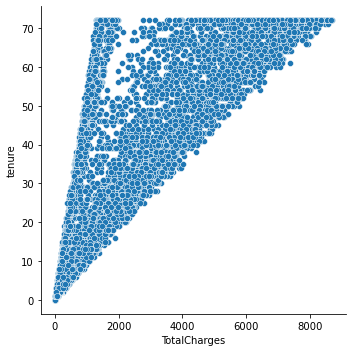

In [72]:
sns.relplot(data=telco, x='TotalCharges',y='tenure')

In [73]:
r,p = stats.pearsonr(telco.TotalCharges,telco.tenure)
r,p

(0.8261783979502475, 0.0)

In [74]:
telco.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [75]:
telco.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

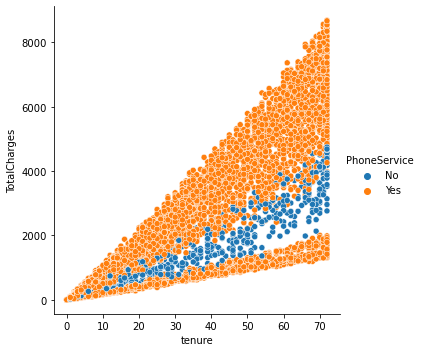

In [76]:
sns.relplot(data=telco, x='tenure',y='TotalCharges', hue='PhoneService')

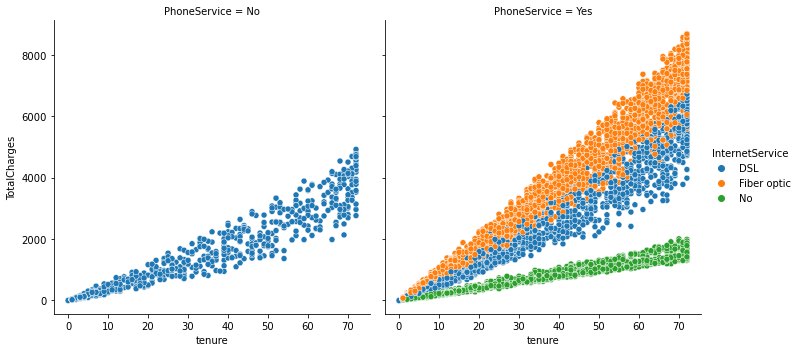

In [77]:
sns.relplot(data=telco, x='tenure',y='TotalCharges', hue='InternetService', col='PhoneService')

In [78]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


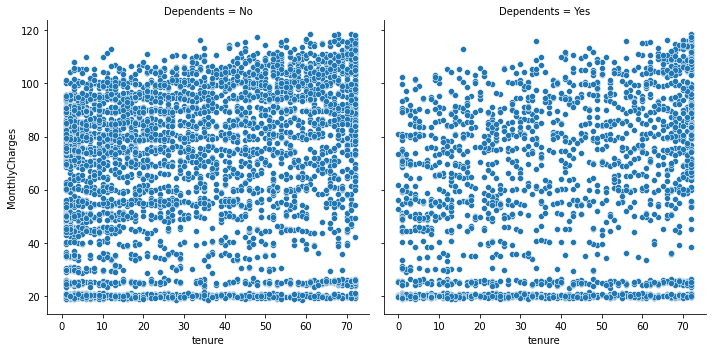

In [79]:
sns.relplot(data=telco, x='tenure',y='MonthlyCharges', col='Dependents')

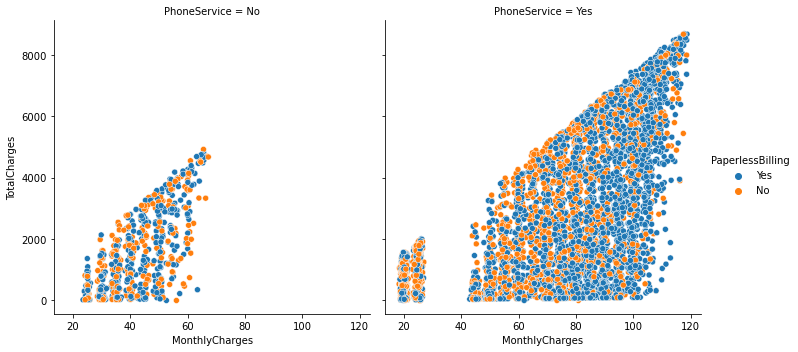

In [80]:
sns.relplot(data=telco, x='MonthlyCharges',y='TotalCharges', hue='PaperlessBilling', col='PhoneService')

In [82]:
#groupby

## Use the employees database.
#### Is there a relationship between how long an employee has been with the company and their salary?
#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [83]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [84]:
sql = '''
SELECT *
FROM employees
join salaries
using (emp_no)
where to_date > NOW()
limit 100
'''

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [85]:
t = '''
select * 
from employees
join titles
using(emp_no)
where to_date > NOW()
limit 100
'''

In [86]:
emp_titles = pd.read_sql(t, url)
emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01


In [87]:
#q = '''
#select emp_no, datediff(now(),hire_date), title
#from employees
#join titles
#using(emp_no)
#where to_date > NOW()
#'''
'''let me redo this'''
q = '''
select emp_no, gender, salary, hire_date , datediff(now(),hire_date) as days_worked, titles_held, datediff(now(), birth_date) as days_alive
from employees
join (select emp_no, count(title) as titles_held from titles group by emp_no) as titles_f
using(emp_no)
join salaries
using(emp_no)
where to_date > now();
'''

titles = pd.read_sql(q, url)
titles.head()

,emp_no,gender,salary,hire_date,days_worked,titles_held,days_alive
0,10001,M,88958,1986-06-26,13188,1,25173
1,10002,F,72527,1985-11-21,13405,1,21247
2,10003,M,43311,1986-08-28,13125,1,22890
3,10004,M,74057,1986-12-01,13030,2,24932
4,10005,M,94692,1989-09-12,12014,2,24667


In [88]:
'''I could use datediff in the SQL query, but I want to try something else'''
'''which I did anyway'''
#strptime(1995-12-3, mm-dd,yyyy)

'which I did anyway'

In [89]:
now = datetime.now()
now

datetime.datetime(2022, 8, 4, 9, 45, 41, 378200)

In [90]:
now + timedelta(minutes=5)

datetime.datetime(2022, 8, 4, 9, 50, 41, 378200)

In [91]:
emp_titles.from_date.head()

0    1986-06-26
1    1996-08-03
2    1995-12-03
3    1995-12-01
4    1996-09-12
Name: from_date, dtype: object

In [92]:
#datetime(emp_titles.from_date)

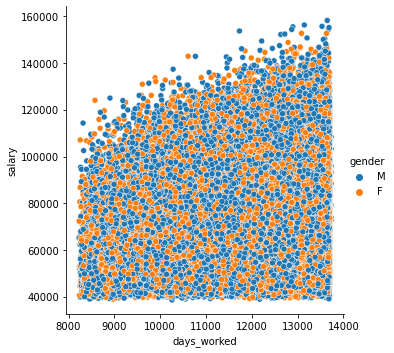

In [93]:
#Is there a relationship between how long an employee has been with the company and their salary?
sns.relplot(data=titles, x='days_worked', y='salary', hue='gender')
plt.show()

In [94]:
titles

,emp_no,gender,salary,hire_date,days_worked,titles_held,days_alive
0,10001,M,88958,1986-06-26,13188,1,25173
1,10002,F,72527,1985-11-21,13405,1,21247
2,10003,M,43311,1986-08-28,13125,1,22890
3,10004,M,74057,1986-12-01,13030,2,24932
4,10005,M,94692,1989-09-12,12014,2,24667
...,...,...,...,...,...,...,...
240119,499995,F,52868,1993-01-12,10796,1,23325
240120,499996,M,69501,1990-09-27,11634,2,25352
240121,499997,M,83441,1986-04-21,13254,2,22281
240122,499998,M,55003,1993-10-13,10522,2,24074


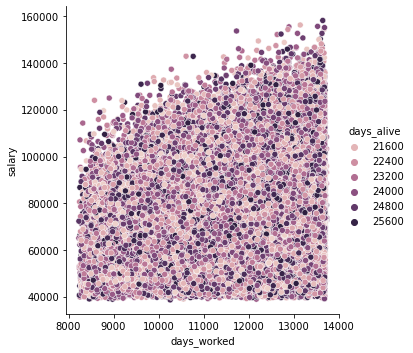

In [95]:
sns.relplot(data=titles, x='days_worked', y='salary', hue='days_alive')
plt.show()

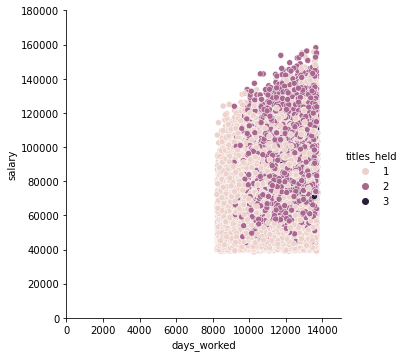

In [96]:
sns.relplot(data=titles, x='days_worked', y='salary', hue='titles_held')
plt.xlim(0,15000)
plt.ylim(0,180000)
plt.show()

In [97]:
titles.gender.value_counts()

M    144114
F     96010
Name: gender, dtype: int64

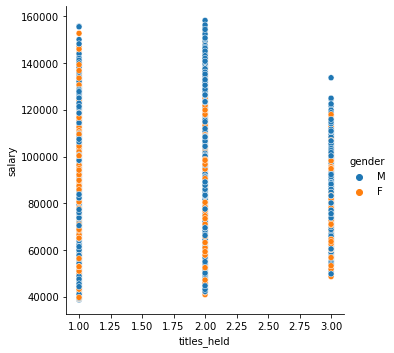

In [98]:
sns.relplot(data=titles, x='titles_held', y='salary', hue='gender')
plt.show()

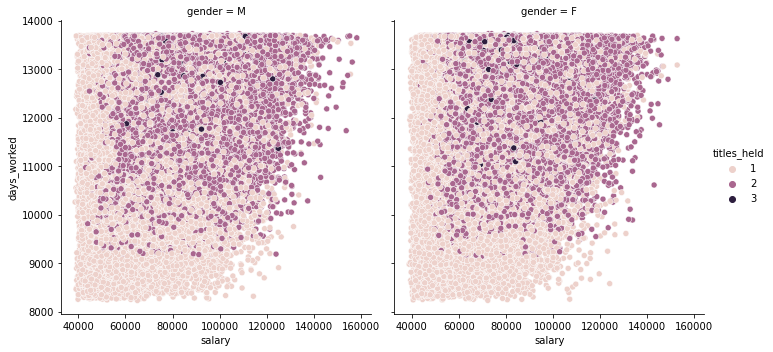

In [100]:
sns.relplot(data=titles, x='salary', y='days_worked', hue='titles_held', col='gender')
plt.show()

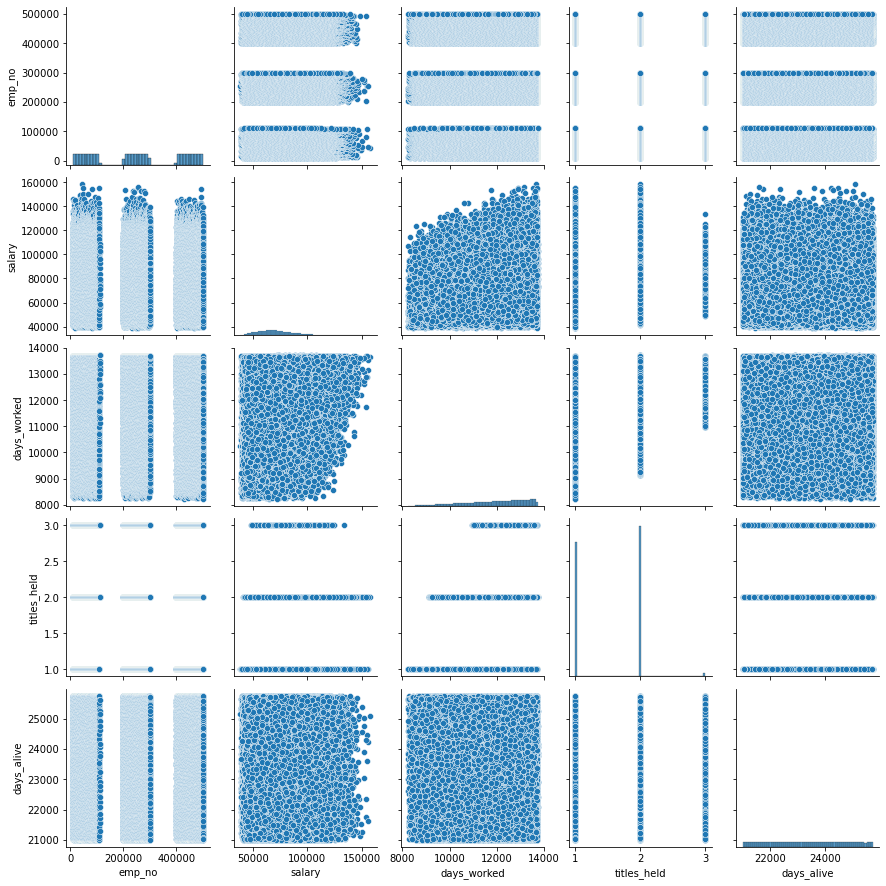

In [101]:
sns.pairplot(titles)

In [102]:
r1,p1 = stats.pearsonr(titles.salary, titles.days_worked)
print('  r =', r1)
print('  p =', p1)

  r = 0.3064625613186014
  p = 0.0


In [103]:
if p1 < alpha:
    print('We reject H0, there is a linear relationship between days worked in the company and salary')
else:
    print('We fail to reject H0, there is no linear relationship between salary and days worked in the company')

We reject H0, there is a linear relationship between days worked in the company and salary


In [104]:
#emp_titles.info()

In [105]:
m = '''
select count(salary) as num_salaries, emp_no, max(salary)
from salaries
group by emp_no
'''

num_salaries = pd.read_sql(m,url)
num_salaries.head()

,num_salaries,emp_no,max(salary)
0,17,10001,88958
1,6,10002,72527
2,7,10003,43699
3,16,10004,74057
4,13,10005,94692


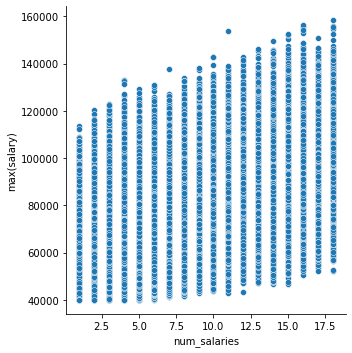

In [106]:
sns.relplot(data=num_salaries, x='num_salaries', y='max(salary)')

In [107]:
merge = pd.merge(num_salaries,titles,on='emp_no')
merge.head()

,num_salaries,emp_no,max(salary),gender,salary,hire_date,days_worked,titles_held,days_alive
0,17,10001,88958,M,88958,1986-06-26,13188,1,25173
1,6,10002,72527,F,72527,1985-11-21,13405,1,21247
2,7,10003,43699,M,43311,1986-08-28,13125,1,22890
3,16,10004,74057,M,74057,1986-12-01,13030,2,24932
4,13,10005,94692,M,94692,1989-09-12,12014,2,24667


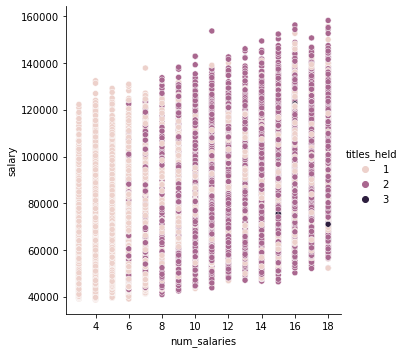

In [108]:
sns.relplot(data=merge, x='num_salaries',y='salary',hue='titles_held')

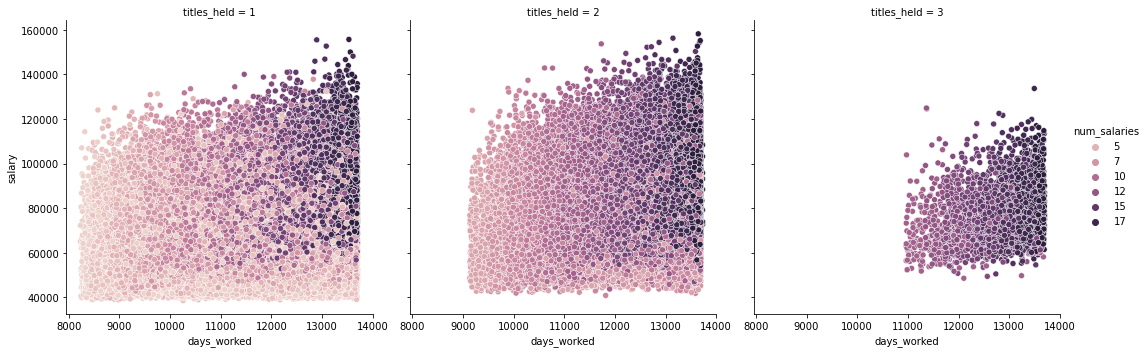

In [119]:
sns.relplot(data=merge, x='days_worked',y='salary', col='titles_held', hue='num_salaries')

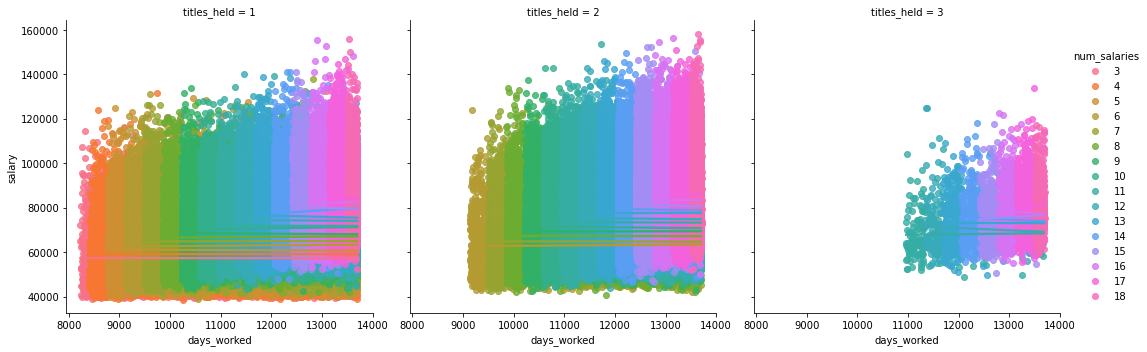

In [122]:
sns.lmplot(data=merge, x='days_worked',y='salary', col='titles_held', hue='num_salaries')
plt.show()

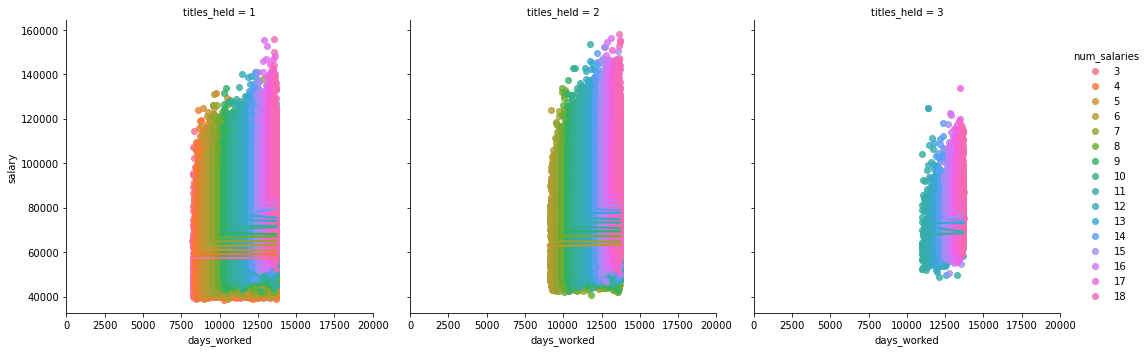

In [121]:
sns.lmplot(data=merge, x='days_worked',y='salary', col='titles_held', hue='num_salaries')
plt.xlim(0,20000)
plt.show()

In [110]:
merge['years_worked'] = merge.days_worked/365
merge.head()

,num_salaries,emp_no,max(salary),gender,salary,hire_date,days_worked,titles_held,days_alive,years_worked
0,17,10001,88958,M,88958,1986-06-26,13188,1,25173,36.131507
1,6,10002,72527,F,72527,1985-11-21,13405,1,21247,36.726027
2,7,10003,43699,M,43311,1986-08-28,13125,1,22890,35.958904
3,16,10004,74057,M,74057,1986-12-01,13030,2,24932,35.698630
4,13,10005,94692,M,94692,1989-09-12,12014,2,24667,32.915068


In [111]:
#sns.relplot(data=merge, x='years_worked',y='salary', col='titles_held', hue='num_salaries', row='gender')
#plt.show()

In [112]:
merge.head()

,num_salaries,emp_no,max(salary),gender,salary,hire_date,days_worked,titles_held,days_alive,years_worked
0,17,10001,88958,M,88958,1986-06-26,13188,1,25173,36.131507
1,6,10002,72527,F,72527,1985-11-21,13405,1,21247,36.726027
2,7,10003,43699,M,43311,1986-08-28,13125,1,22890,35.958904
3,16,10004,74057,M,74057,1986-12-01,13030,2,24932,35.698630
4,13,10005,94692,M,94692,1989-09-12,12014,2,24667,32.915068


In [113]:
len(merge)

240124

## Use the sleepstudy data. Is there a relationship between days and reaction time?

$H_0$: There is no relationship

$H_a$: There is some sort of relationship

In [114]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


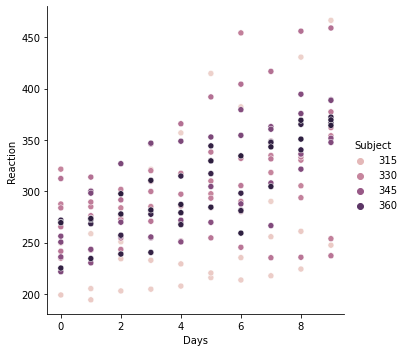

In [115]:
sns.relplot(data=sleep, x='Days', y='Reaction', hue='Subject')

In [116]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

In [117]:
if p < alpha:
    print('We reject H0, there is a linear relationship between sleep deprivation and reaction time')
else:
    print('We fail to reject H0, there is no linear relationship between sleep deprivation and reaction time')

We reject H0, there is a linear relationship between sleep deprivation and reaction time
